In [1]:
# Load the CSV into a dataframe and display the column names
import pandas as pd
df=pd.read_csv('/Users/markleung3/Documents/VScode/student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
# Data Wrangling - Normalizing data, Rename the columns in the dataset for clarify
df.rename(columns={'famsize':'family_size','Pstatus':'parent_live_together','Medu':'mother_edu','Fedu':'father_edu','traveltime':'traffic_time','failures':'exam_failed','paid':'extra_paid_classes','higher':'willing_to_take_higher_edu','romantic':'in_a_relationship','famrel':'fam_relationship','goout':'hang_out','Dalc':'workday_alcohol_consumption','Walc':'weekday_alcohol_consumption','G1':'1st_grade','G2':'2nd_grade','G3':'3rd_grade'},inplace=True)
df.columns

Index(['school', 'sex', 'age', 'address', 'family_size',
       'parent_live_together', 'mother_edu', 'father_edu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traffic_time', 'studytime', 'exam_failed',
       'schoolsup', 'famsup', 'extra_paid_classes', 'activities', 'nursery',
       'willing_to_take_higher_edu', 'internet', 'in_a_relationship',
       'fam_relationship', 'freetime', 'hang_out',
       'workday_alcohol_consumption', 'weekday_alcohol_consumption', 'health',
       'absences', '1st_grade', '2nd_grade', '3rd_grade'],
      dtype='object')

In [4]:
# Data Wrangling - Finding and Remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
# Data Wrangling - Finding and Impoting Missing values, Check if there is any null, fill it or replace it if there is any
df.isnull().sum()

school                         0
sex                            0
age                            0
address                        0
family_size                    0
parent_live_together           0
mother_edu                     0
father_edu                     0
Mjob                           0
Fjob                           0
reason                         0
guardian                       0
traffic_time                   0
studytime                      0
exam_failed                    0
schoolsup                      0
famsup                         0
extra_paid_classes             0
activities                     0
nursery                        0
willing_to_take_higher_edu     0
internet                       0
in_a_relationship              0
fam_relationship               0
freetime                       0
hang_out                       0
workday_alcohol_consumption    0
weekday_alcohol_consumption    0
health                         0
absences                       0
1st_grade 

In [6]:
# Check data types. Ensure each columns data types are same(dtypes/astypes)
df.dtypes

school                         object
sex                            object
age                             int64
address                        object
family_size                    object
parent_live_together           object
mother_edu                      int64
father_edu                      int64
Mjob                           object
Fjob                           object
reason                         object
guardian                       object
traffic_time                    int64
studytime                       int64
exam_failed                     int64
schoolsup                      object
famsup                         object
extra_paid_classes             object
activities                     object
nursery                        object
willing_to_take_higher_edu     object
internet                       object
in_a_relationship              object
fam_relationship                int64
freetime                        int64
hang_out                        int64
workday_alco

In [7]:
# Exploratory Data Analysis - How many students are in each of the school (group by school)
df1=df['school'].value_counts()
print(f"Gabriel Pereira : {df1['GP']} \nMousinho da Silveira : {df1['MS']}")

Gabriel Pereira : 349 
Mousinho da Silveira : 46


In [8]:
# Exploratory Data Analysis - How many Males and females in each school
df5=df[{'school','sex'}].value_counts().reset_index().rename(columns={0:'counts'})
df5

,school,sex,counts
0,GP,F,183
1,GP,M,166
2,MS,F,25
3,MS,M,21


In [28]:
# Exploratory Data Analysis - Sum the G1+G2+G3, to a total grade
df['total_grade']=df.iloc[:,-4:-1].sum(axis=1)
df['total_grade'].max()

59

In [29]:
# Exploratory Data Analysis - sum father_edu, mother_edu to Parent's education level
df['parent_edu_level']=df['father_edu']+df['mother_edu']
df['parent_edu_level']

0      8
1      2
2      2
3      6
4      6
      ..
390    4
391    4
392    2
393    5
394    2
Name: parent_edu_level, Length: 395, dtype: int64

In [30]:
df['total_grade'].value_counts()

30    28
45    23
39    19
33    19
29    18
36    17
34    15
27    15
42    14
0     13
24    13
25    13
32    12
41    10
28     9
47     9
54     9
31     9
38     8
23     8
48     7
35     7
37     7
18     6
5      6
44     6
17     5
26     5
15     5
9      5
40     5
7      4
19     4
22     4
8      4
46     3
56     3
21     3
51     3
20     3
6      3
50     2
43     2
53     2
10     2
57     2
14     1
16     1
4      1
49     1
52     1
59     1
Name: total_grade, dtype: int64

In [31]:
# Exploratory Data Analysis - What is the average performance of students based on their study time
df['studytime'].describe()

count    395.000000
mean       2.035443
std        0.839240
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

<AxesSubplot:>

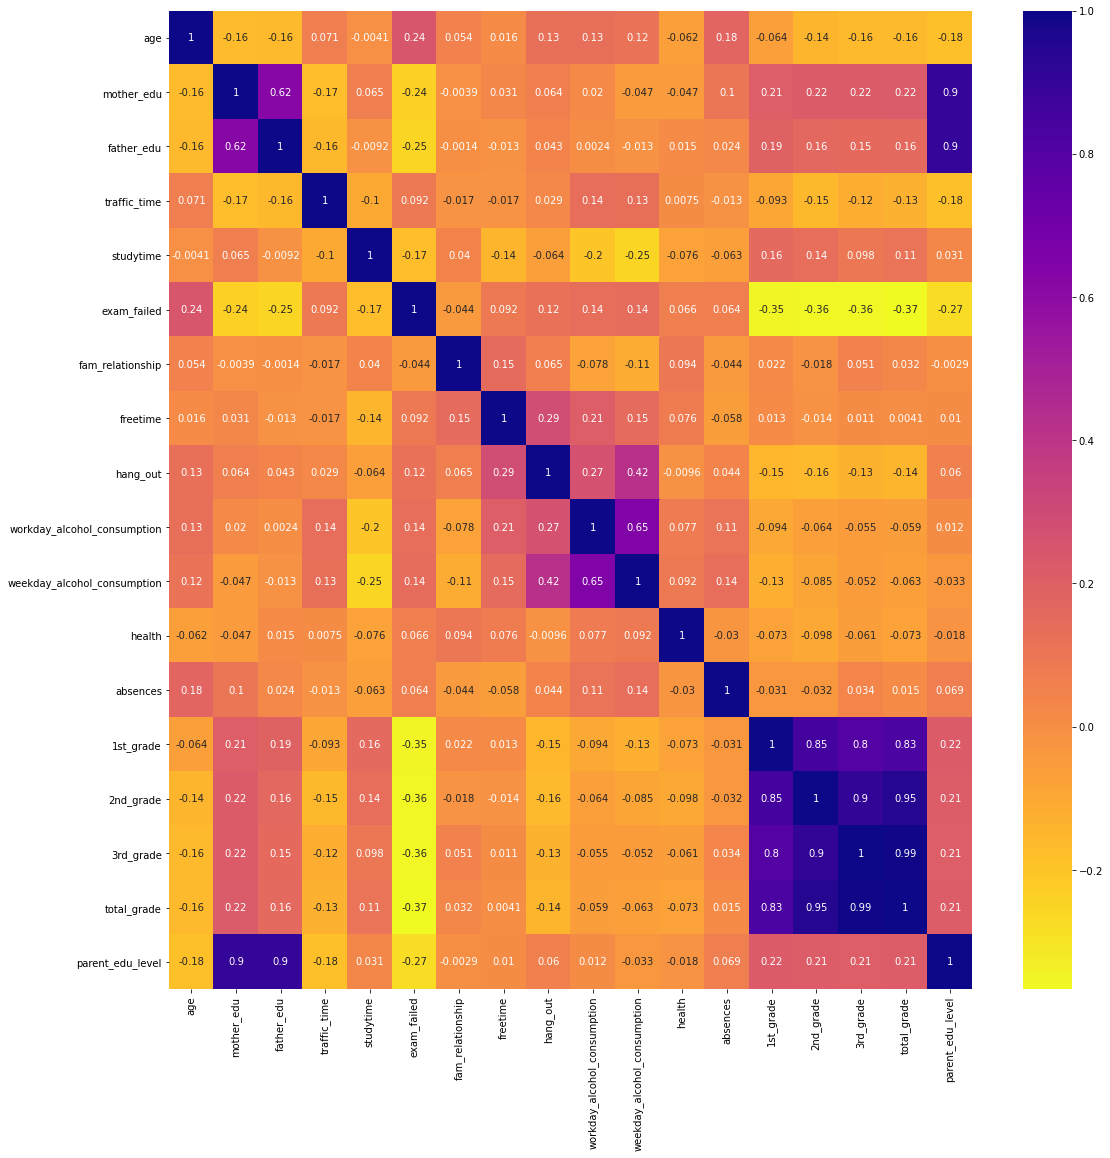

In [32]:
df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap="plasma_r", annot=True)

In [33]:
# Exploratory Data Analysis - Finding correlation
df2=df.corr()
df3=df2.unstack().sort_values(ascending=False)
df3.drop_duplicates(inplace=True)
df3[df3<1].head(20)

3rd_grade                    total_grade                    0.991979
2nd_grade                    total_grade                    0.951418
3rd_grade                    2nd_grade                      0.904868
mother_edu                   parent_edu_level               0.901584
parent_edu_level             father_edu                     0.900333
2nd_grade                    1st_grade                      0.852118
total_grade                  1st_grade                      0.832718
1st_grade                    3rd_grade                      0.801468
workday_alcohol_consumption  weekday_alcohol_consumption    0.647544
father_edu                   mother_edu                     0.623455
weekday_alcohol_consumption  hang_out                       0.420386
hang_out                     freetime                       0.285019
workday_alcohol_consumption  hang_out                       0.266994
age                          exam_failed                    0.243665
total_grade                  mothe

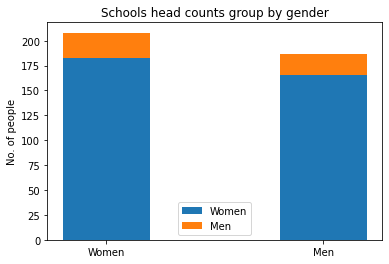

In [34]:
# Data visualization- Use matplotlib to create a bar chart comparing the school head counts between Male and Female
import matplotlib.pyplot as plt
labels = ['Women','Men']
school_GP = df5[df5['school']=='GP']['counts']
school_MS = df5[df5['school']=='MS']['counts']
width = 0.4
fig, ax = plt.subplots()
ax.bar(labels, school_GP, width, label='Women')
ax.bar(labels, school_MS, width, bottom=school_GP,label='Men')
ax.set_ylabel('No. of people')
ax.set_title('Schools head counts group by gender')
ax.legend()

plt.show()

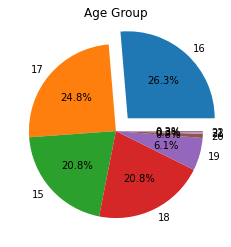

In [35]:
# Data visualization - create a pie chart for age group
age_grp=df['age'].value_counts()
age_grp
labels=[16,17,15,18,19,20,21,22]
myexplode = [0.2, 0, 0, 0,0,0,0,0]
plt.pie(age_grp, labels=labels,explode=myexplode,autopct ='%1.1f%%',radius=1)
plt.title('Age Group')
plt.show() 

In [36]:
# Data visualization- Use matplotlib to create a bar chart comparing the family size between 2 schools
sch_fam=df[['school','family_size']].value_counts().reset_index().rename(columns={0:'counts'})

import plotly.express as px

fig = px.bar(sch_fam, x='school', y='counts', color="family_size", title="Family size",barmode='group',text_auto=True)
fig.update_layout(legend_title_text='Family size')
fig.show()

In [37]:
# Data visualization- Create pie charts displaying the differences between student's father and mother job
from plotly.subplots import make_subplots
import plotly.graph_objects as go
mj=df['Mjob'].value_counts().reset_index()
mj
fj=df['Fjob'].value_counts().reset_index()
fj
labels = fj['index']

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=["Mother's job", "Father's job"])
fig.add_trace(go.Pie(labels=labels, values=mj['Mjob'], scalegroup='one',name="Mother",pull=[0, 0, 0,0.2, 0]), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=fj['Fjob'], scalegroup='one',name="Father",pull=[0, 0, 0,0.2, 0]), 1, 2)

fig.update_layout(title_text="The parent's occupation")
fig.show()

In [38]:
# Data visualization- Create bar charts to see the responses on activities
fig = make_subplots(3, 3,subplot_titles=("Reasons of School selection","Extra educational support ", "Family support",'Extra-paid classes','Extra-curricular activities','Attended nursery school','Willing to take higher education','Internet access','Romantic relationship'))
fig.add_trace(go.Bar(x=['course','home','reputation','other'], y=df['reason'].value_counts(),marker=dict(color=[1,2,3,4])),1, 1)

fig.add_trace(go.Bar(x=df['schoolsup'], y=df['schoolsup'].value_counts(),marker=dict(color=[1,2])),1, 2)
fig.add_trace(go.Bar(x=['yes','no'], y=df['famsup'].value_counts(),marker=dict(color=[1,2])),1, 3)
fig.add_trace(go.Bar(x=['yes','no'], y=df['extra_paid_classes'].value_counts(ascending=True),marker=dict(color=[1,2])),2, 1)
fig.add_trace(go.Bar(x=['yes','no'], y=df['activities'].value_counts(),marker=dict(color=[1,2])),2, 2)
fig.add_trace(go.Bar(x=df['nursery'], y=df['nursery'].value_counts(),marker=dict(color=[1,2])),2, 3)
fig.add_trace(go.Bar(x=['yes','no'], y=df['willing_to_take_higher_edu'].value_counts(),marker=dict(color=[1,2])),3, 1)
fig.add_trace(go.Bar(x=df['internet'], y=df['internet'].value_counts(),marker=dict(color=[1,2])),3, 2)
fig.add_trace(go.Bar(x=['yes','no'], y=df['in_a_relationship'].value_counts(ascending=True),marker=dict(color=[1,2])),3, 3)
fig.update_layout(showlegend=False)
fig.update_annotations(font_size=12)
fig.show()

In [39]:
# Data visualization- How is family relationship affected student performance?

fig = px.box(df, x='fam_relationship', y='total_grade',points='all')
fig.show()

In [40]:
# Data visualization- Is student performance better if the student have more free time?

fig = px.box(df, x='freetime', y='total_grade',points='all')
fig.show()

In [41]:
# Data visualization- How is alcohol consumption affected student performance?

fig = px.box(df, x='workday_alcohol_consumption', y='total_grade',points='all')
fig.show()

In [42]:
fig = px.box(df, x='weekday_alcohol_consumption', y='total_grade',points='all')
fig.show()

In [43]:
fig = px.histogram(df, x="absences",nbins=60,color="absences")
fig.show()

<AxesSubplot:xlabel='exam_failed', ylabel='total_grade'>

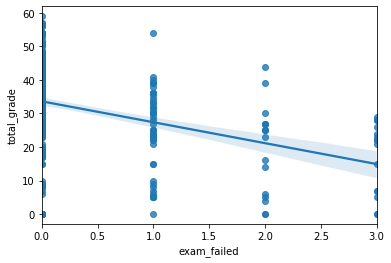

In [44]:
sns.regplot(x='exam_failed', y='total_grade', data=df)

<AxesSubplot:xlabel='health', ylabel='total_grade'>

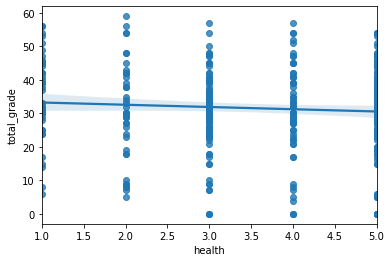

In [45]:
sns.regplot(x='health', y='total_grade', data=df)

<AxesSubplot:xlabel='parent_edu_level', ylabel='total_grade'>

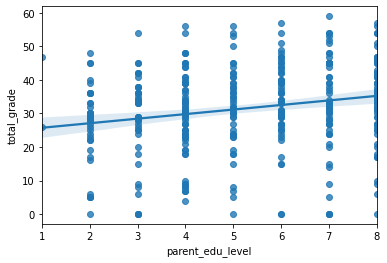

In [48]:
sns.regplot(x='parent_edu_level', y='total_grade', data=df)

In [47]:
df.columns

Index(['school', 'sex', 'age', 'address', 'family_size',
       'parent_live_together', 'mother_edu', 'father_edu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traffic_time', 'studytime', 'exam_failed',
       'schoolsup', 'famsup', 'extra_paid_classes', 'activities', 'nursery',
       'willing_to_take_higher_edu', 'internet', 'in_a_relationship',
       'fam_relationship', 'freetime', 'hang_out',
       'workday_alcohol_consumption', 'weekday_alcohol_consumption', 'health',
       'absences', '1st_grade', '2nd_grade', '3rd_grade', 'total_grade',
       'parent_edu_level'],
      dtype='object')